#### CELLULAR AUTOMATA

Andeo, Lovely\
2020-05405\
FX-2

Importing all the necessary packages.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

Here, I created a function to perform the elementary cellular automata.

In [134]:
def elem_CA(n, columns):
    # n determines the rule from 0 to 255
    output = [int(x) for x in np.binary_repr(n, width=8)]
    input = np.zeros([255,3])

    for i in range(n):
        input[i,:] = [int(x) for x in np.binary_repr(7-i, width=3)]
    rows = int(columns/2)+1
    bg = np.zeros([rows,columns+2])
    bg[0, int(columns/2)+1]=1

    for i in np.arange(0,rows-1):
        for j in np.arange(0,columns):
            for k in range(8):
                if np.array_equal(input[k, :], bg[i, j:j+3]):
                    bg[i+1,j+1] = output[k]
                    
    fig, ax = plt.subplots(figsize=(8, 6)) 
    ax.imshow(bg[:, 1:columns+1], cmap='Greys', interpolation='nearest')
    ax.set_title('Elementary CA Rule {}'.format(n))
    plt.show()

Then, I tested out some examples.

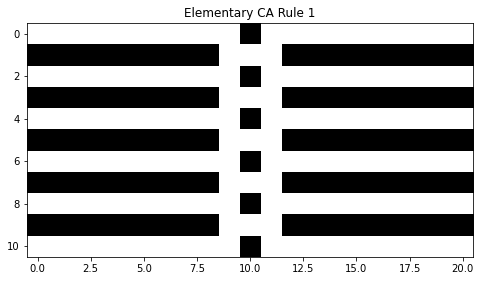

In [135]:
elem_CA(1, 21)

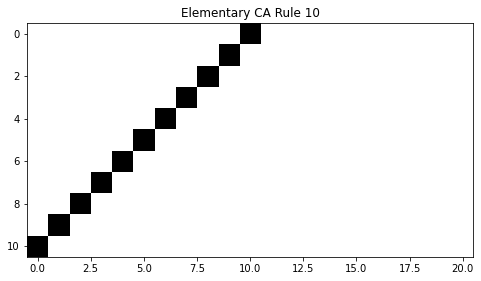

In [107]:
elem_CA(10, 21)

Moreover, I also created a function on the rule 90 in the elementary CA. This is mainly to show how the transition rule is being performed.

In [113]:
def rule_90_ca(num_steps, num_cells):
    current_row = [0] * num_cells
    current_row[num_cells // 2] = 1  

    pattern = [current_row[:]]  

    for _ in range(num_steps):
        next_row = []
        for i in range(num_cells):
            left = current_row[(i-1) % num_cells]
            center = current_row[i]
            right = current_row[(i+1) % num_cells]
            next_row.append(rule_90_rule(left, center, right))
        current_row = next_row
        pattern.append(current_row[:])

    fig, ax = plt.subplots(figsize=(10, 6)) 
    ax.imshow(pattern, cmap='binary')
    ax.set_title('CA Rule 90 pattern')
    plt.show()

def rule_90_rule(left, center, right):
    return left ^ right  

Then, I also tested out different steps and cells values

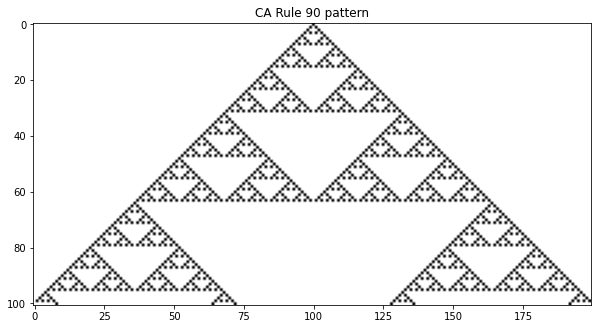

In [114]:
rule_90_ca(100, 200)

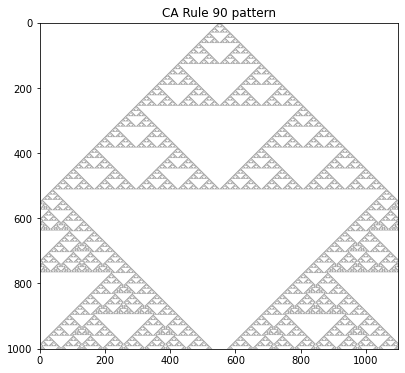

In [121]:
rule_90_ca(1000, 1100)

Then this part is some of the exercises mentioned in the guide. I'd like to credit the author of Think Complexity, Allen Downey, for some of the functions used here.

**Exercise 5.1**:  Write a version of correlate that returns the same result as np.correlate with mode='same'.



In [7]:
# Creating an array
N = 10
row = np.arange(N, dtype=np.uint8)

# Adding window
window = [1, 1, 1]

# Adding zeros on both sides
np.pad(row, 1, 'constant')

def c_k(a, w, k):
    N = len(w)
    return sum(a[k:k+N] * w)

# Creating the new function
def correlate_same(row, window):
    cols = len(row)
    N = len(window)
    padded = np.pad(row, 1, 'constant')
    c = [c_k(padded, window, k) for k in range(cols)]
    return np.array(c)

c = correlate_same(row, window)
print(c)

[ 1  3  6  9 12 15 18 21 24 17]


In [9]:
# Showing the usual result  with the valid mode in correlate function
c = np.correlate(row, window, mode='valid')
print(c)

[ 3  6  9 12 15 18 21 24]


In [8]:
# Showing the usual result  with the same mode in correlate function
c = np.correlate(row, window, mode='same')
print(c)

[ 1  3  6  9 12 15 18 21 24 17]


These are the same output as the result of the correlate_same function.

**Exercise 5.2**:  Experiment with rule 110 and some of its spaceships

In [140]:
def make_table(rule):
    rule = np.array([rule], dtype=np.uint8)
    table = np.unpackbits(rule)[::-1]
    return table

In [175]:
class Cell1D:
    """Represents a 1-D a cellular automaton"""
    
    def __init__(self, rule, n, m=None):
        """Initializes the CA.

        rule: integer
        n: number of rows
        m: number of columns

        Attributes:
        table:  rule dictionary that maps from triple to next state.
        array:  the numpy array that contains the data.
        next:   the index of the next empty row.
        """
        self.table = make_table(rule)
        self.n = n
        self.m = 2*n + 1 if m is None else m

        self.array = np.zeros((n, self.m), dtype=np.int8)
        self.next = 0

    def start_single(self):
        """Starts with one cell in the middle of the top row."""
        self.array[0, self.m//2] = 1
        self.next += 1

    def start_random(self):
        """Start with random values in the top row."""
        self.array[0] = np.random.randint(2, size=self.m)
        self.next += 1

    def start_string(self, s):
        """Start with values from a string of 1s and 0s."""
        # TODO: Check string length
        self.array[0] = np.array([int(x) for x in s])
        self.next += 1

    def loop(self, steps=1):
        """Executes the given number of time steps."""
        for i in range(steps):
            self.step()

    def step(self):
        """Executes one time step by computing the next row of the array."""
        a = self.array
        i = self.next
        window = [4, 2, 1]
        c = np.correlate(a[i-1], window, mode='same')
        a[i] = self.table[c]
        self.next += 1

    def draw(self, start=0, end=None):
        """Draws the CA using pyplot.imshow.

        start: index of the first column to be shown
        end: index of the last column to be shown
        """
        a = self.array[:, start:end]
        plt.figure(figsize=(8, 6))  # Adjust the width and height values as desired

        plt.imshow(a, cmap='Greys', alpha=0.7)
        plt.show()


In [176]:
def run_ca(init, n=None, rule=110):
    m = len(init)
    n = m if n is None else n
    
    ca = Cell1D(rule, n, m)
    ca.start_string(init)
    ca.loop(n-1)
    return ca

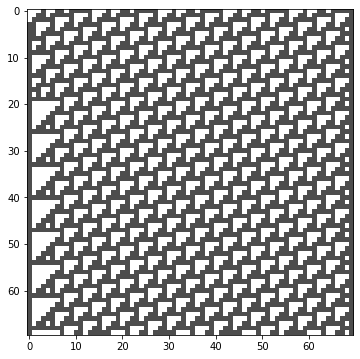

In [177]:
background = '00010011011111'

ca = run_ca(background * 5)
ca.draw()

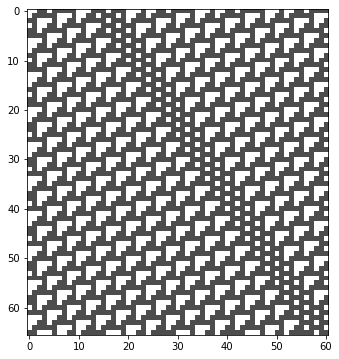

In [178]:
ship1 = '0001110111'

ca = run_ca(background + ship1 + background * 3)
ca.draw(start=4, end=-1)

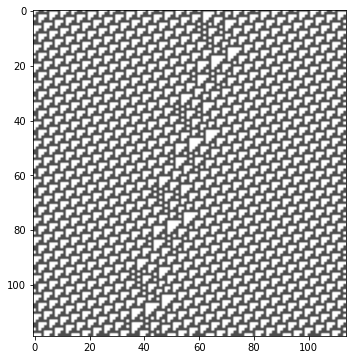

In [179]:
ship2 = '1001111'

ca = run_ca(background * 5 + ship2 + background * 3)
ca.draw(start=4, end=-1)

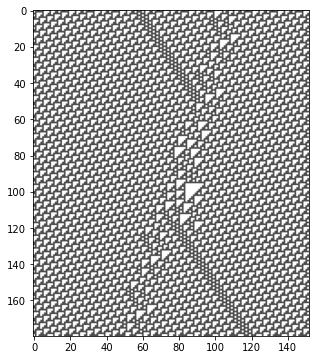

In [182]:
init = background*4 + ship1 + background*3 + ship2 + background*3

ca = run_ca(init, n=180)
ca.draw(start=4, end=-1)

**Exercise 5.3**: Implement a Turing machine

In [60]:
class Turing(Cell1D):

    def __init__(self, table, n, m=None):
        self.n = n
        self.m = n if m is None else m
        
        self.tape = np.zeros((n, self.m), dtype=np.uint8)
        self.head = np.zeros(n, dtype=np.int64)
        self.head[0] = m//2
        self.state = 'A'
        self.table = table
        self.next = 1

    def loop(self, steps=1):
        for i in range(steps):
            try:
                self.step()
            except StopIteration:
                break

    def step(self):
        if self.state == 'HALT':
            raise StopIteration
            
        a = self.tape
        i = self.next
        a[i] = a[i-1]
        head = self.head[i-1]
        symbol = a[i-1, head]
        print(symbol, self.state, end=': ')
        new_symbol, move, self.state = self.table[symbol, self.state]
        print(new_symbol, move, self.state)
        
        a[i, head] = new_symbol
        if move == 'R':
            head += 1
        else:
            head -= 1
        self.head[i] = head
        self.next += 1
        
    def draw(self, start=0, end=None):

        # draw the cells
        a = self.tape[:, start:end]
        plt.imshow(a, cmap='Blues', alpha=0.4)
        
        # draw the read-write head
        xs = self.head
        ys = np.arange(len(xs))
        plt.plot(xs, ys, 'r.')

0 A: 1 R B
0 B: 1 L A
1 A: 1 L C
0 C: 1 L B
0 B: 1 L A
0 A: 1 R B
1 B: 1 R B
1 B: 1 R B
1 B: 1 R B
1 B: 1 R B
0 B: 1 L A
1 A: 1 L C
1 C: 1 R HALT


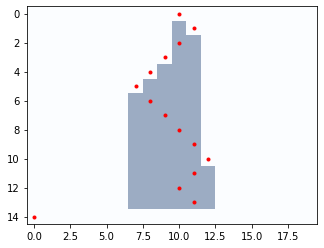

In [62]:
# Creating the action table
table = {}
table[0, 'A'] = 1, 'R', 'B' 
table[0, 'B'] = 1, 'L', 'A' 
table[0, 'C'] = 1, 'L', 'B'
table[1, 'A'] = 1, 'L', 'C' 
table[1, 'B'] = 1, 'R', 'B' 
table[1, 'C'] = 1, 'R', 'HALT'

# Creating the turing machine
n = 15
m = 20
turing = Turing(table, n, m)

turing.loop(n-1)
turing.draw()

**Exercise 5.4**: Implement and test several PRNGs

In [63]:
class LCG:
    def __init__(self, seed, a, c, m):
        self.state = seed
        self.a = a
        self.c = c
        self.m = m

    def rand(self):
        self.state = (self.a * self.state + self.c) % self.m
        return self.state / self.m


def test_lcg():
    seed = 1
    a = 1664525
    c = 1013904223
    m = 2 ** 32

    lcg = LCG(seed, a, c, m)
    for _ in range(10):
        print(lcg.rand())


test_lcg()


0.23645552527159452
0.3692706737201661
0.5042420323006809
0.7048832636792213
0.05054362863302231
0.3695183543022722
0.7747629624791443
0.556188570568338
0.0164932357147336
0.6392460397910327


In [64]:
def rule_30_ca(num_steps, num_cells):
    current_row = [0] * num_cells
    current_row[num_cells // 2] = 1  # Set the center cell to 1

    for _ in range(num_steps):
        print_row_as_bits(current_row)
        next_row = []
        for i in range(num_cells):
            left = current_row[(i-1) % num_cells]
            center = current_row[i]
            right = current_row[(i+1) % num_cells]
            next_row.append(rule_30_rule(left, center, right))
        current_row = next_row

def rule_30_rule(left, center, right):
    if left != right:
        return 1
    return 0

def print_row_as_bits(row):
    for cell in row:
        print(cell, end='')
    print()


# Test the Rule 30 CA with 500 cells and 100 time steps
rule_30_ca(100, 500)


00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000